# Codigo de la figura 2.11: Modelo IF con adaptación y coeficiente de adaptación $w$



# 0. Importar bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Variables de entorno

- `tiempo_total = 300`: Duración total de la simulación en milisegundos.
- `paso_tiempo = 0.1`: Paso de tiempo en la simulación.
- `tiempo = np.arange(0, tiempo_total, paso_tiempo)`: Espacio de tiempo para la simulación.

## Corriente Aplicada
- `corriente_aplicada`: Corriente constante aplicada durante la simulación en mV

## Parámetros de la Neurona
- `potencial_reposo = 15`: Potencial de reposo de la neurona.
- `constante_de_tiempo_membrana = 15`: Constante de tiempo de la membrana neuronal.
- `umbral_potencial = 30`: Umbral de disparo de la neurona.
- `potencial_reposo_reset = 0`: Potencial de reposo después del reset.
- `umbral_tiempo = 0`: Tiempo de inicio del conteo para el umbral.

## Condición Inicial
- `potencial_inicial = 0`: Potencial inicial de la neurona.
- `a = 0.3`: Parámetro `a` para la adaptación.
- `tau_w = 400`: Constante de tiempo para la adaptación.

In [2]:
tiempo_total = 300
paso_tiempo = 0.1
tiempo = np.arange(0, tiempo_total, paso_tiempo)
corriente_aplicada = np.zeros_like(tiempo) + 37
potencial_reposo = 15
constante_de_tiempo_membrana = 15
umbral_potencial = 30
potencial_reposo_reset = 0
umbral_tiempo = 0
b = 2
potencial_inicial = 0
a = 0.3
tau_w = 400

# 2. Simulación de Neurona con Adaptación - Cálculos

Se realiza la simulación de la neurona con adaptación utilizando el método de Euler:

- Inicialización de variables:
  - `potencial_membrana`: Potencial de membrana a lo largo del tiempo.
  - `corriente_w`: Corriente de adaptación `w` a lo largo del tiempo.
  - `tiempos_spike`: Lista de tiempos en los que se generan spikes.
  - `periodos_spike`: Lista de periodos entre spikes.

- Iteración sobre los puntos de tiempo:
  - Método de Euler para actualizar el potencial de membrana y la corriente de adaptación.
  - Condición de umbral y reset:
    - Si el potencial de membrana supera el umbral, se reinicia y se ajusta la corriente de adaptación.
    - Se registran los tiempos de los spikes y se calculan los periodos entre spikes.

Los resultados de la simulación se almacenan en las variables `potencial_membrana`, `corriente_w`, `tiempos_spike` y `periodos_spike`.

In [3]:
potencial_membrana = np.zeros_like(tiempo)
corriente_w = np.zeros_like(tiempo)
tiempos_spike = np.array([])
periodos_spike = np.array([])
potencial_membrana[0] = potencial_inicial
corriente_w[0] = 0

for i in range(len(tiempo)-1):
    potencial_membrana[i+1] = potencial_membrana[i] + paso_tiempo * (-(potencial_membrana[i]) + corriente_aplicada[i] - corriente_w[i]) / constante_de_tiempo_membrana
    corriente_w[i+1] = corriente_w[i] + paso_tiempo * (-corriente_w[i] + a * (potencial_membrana[i] - potencial_reposo)) / tau_w

    if potencial_membrana[i+1] >= umbral_potencial:
        potencial_membrana[i+1] = potencial_reposo_reset
        corriente_w[i+1] = corriente_w[i+1] + b
        potencial_membrana[i] = umbral_potencial
        tiempos_spike = np.append(tiempos_spike, tiempo[i+1])
        if periodos_spike.size == 0:
            periodos_spike = np.append(periodos_spike, tiempos_spike[-1])
        else:
            periodos_spike = np.append(periodos_spike, round(tiempos_spike[-1] - tiempos_spike[-2], 2))

# 3. Gráfico del potencial de membrana en IF con adaptación (1) y coeficiente de adaptación $w$ (2)

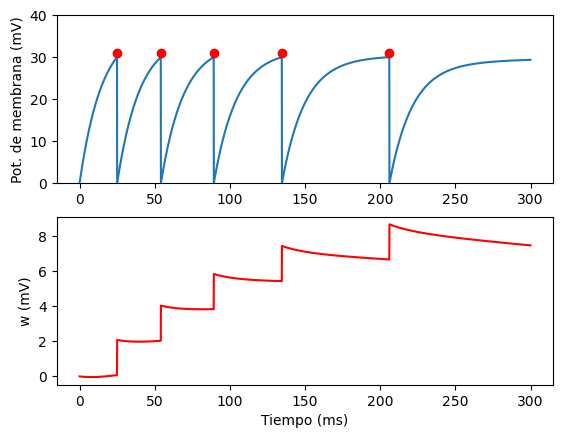

In [4]:
plt.subplot(2, 1, 1)
plt.plot(tiempo, potencial_membrana)
plt.plot(tiempos_spike, umbral_potencial + 1 + 0*tiempos_spike, 'ro')
plt.ylabel('Pot. de membrana (mV)')
plt.ylim(0, 40)

plt.subplot(2, 1, 2)
plt.plot(tiempo, corriente_w, color="red")
plt.xlabel('Tiempo (ms)')
plt.ylabel('w (mV)')
plt.show()

# 4. Duración de los intervalos entre spikes

In [5]:
resultado = ', '.join(map(str, periodos_spike))
print(resultado)

25.0, 29.1, 35.2, 45.3, 71.5
